# Exploring Seattle City Wages

This is a short look at the wage data for various public departments within my city of Seeatle. This and other public municipal data is readily available through Seattle's [Open Data Portal](https://data.seattle.gov/)

## Data Download

I pulled this data from the city's open data page on [wages for various public servant positions](https://data.seattle.gov/City-Administration/City-of-Seattle-Wage-Data/2khk-5ukd/about_data).
I'm subsequently updating and posting my version of the data on GitHub for easy access in purposes of this project. The only difference between this updated version and the original downloadable
version of from the open data portal is that I have removed the first and last names of all employees (yes, even well-known positions like the mayor). In the place of employee names, I've added a single ID column.

This project is just some basic exploratory data analysis. The only necessary packages are `pandas`, `matplotlib`, and `seaborn`, so nothing out of the ordinary. We'll read in the comma-deliminated data with `pandas`, and convert the column headers to snake_case for easier handling.

Taking a look at the data, we see our four data fields: 3 string columns and 1 numeric column.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FuncFormatter

path = "https://raw.githubusercontent.com/bryantjay/Portfolio/refs/heads/main/Quickies/Seattle%20Labor%20Spending%20by%20Department/source_files/City_of_Seattle_Wage_Data_20250222.csv"

wages = pd.read_csv(path)

wages.columns = wages.columns.str.strip().str.replace(' ', '_').str.replace(r'([a-z0-9])([A-Z])', r'\1_\2').str.lower()

print(wages.head(10), "\n")
print(wages.info(), "\n")
print(wages.describe(include='all'))

  employee_id                      department                 job_title  \
0      E00001  Office of Economic Development        StratAdvsr2,Exempt   
1      E00002  Office of Economic Development        Admin Staff Asst *   
2      E00003      Education & Early Learning        StratAdvsr1,Exempt   
3      E00004      Education & Early Learning          Admin Staff Asst   
4      E00005      Education & Early Learning  Grants&Contracts Spec,Sr   
5      E00006      Education & Early Learning       Early Ed Spec,Sr BU   
6      E00007    Police Relief & Pension Fund       Contract Employee *   
7      E00008              Parks & Recreation         Sfty&Hlth Spec,Sr   
8      E00009              Parks & Recreation      High School Intern *   
9      E00010              Parks & Recreation      High School Intern *   

   hourly_rate  
0       71.320  
1       38.460  
2       60.646  
3       44.830  
4       43.100  
5       52.200  
6       94.473  
7       53.820  
8       19.970  
9   

## Early Exploration

In the above `describe()` statement, we can note a few things:
- 13,149 rows are included, each referencing a single department position
- The data includes a total of 40 different city departments, and 1157 different positions (not counting similarly-named positions of different departments).
- Parks & Rec seems to have the most number of employed positions out of all departments.
- Hourly wages range from $5.53/hr (which is technically illegal, but there's more to this number) to $236.48/hr(!).
- Most people are paid within the range of $38-65 per hour.

The department statistics are really what I'm after here. Moving forward, I'm gonna group the data into the different departments, and subsequently explore the aggregates. We'll take a look at the number of different positions for each department, the number of employees for each, and the mean and median wages. Since we're dealing with wage data, and wages are typically skewed towards higher earners, the wage medians will be our most reliable central tendency statistic.

I'm also creating a simple statistic for hourly labor expenditures `hourly_dept_exp` for each department, which is the product of the department's median wage and its total number of employees (or at least, employed positions).

In [2]:
print(f"Number of City Departments: {wages['department'].nunique()}")
print(f"Total Number of Positions: {wages['job_title'].nunique()}")

departments = wages.groupby('department').agg(
    unique_job_titles=('job_title', 'nunique'),
    num_employees=('employee_id', 'size'),
    mean_hourly_rate=('hourly_rate', lambda x: round(x.mean(), 2)),
    median_hourly_rate=('hourly_rate', lambda x: round(x.median(), 2))
).reset_index()

departments['pct_mean_med_diff'] = round((departments.mean_hourly_rate - departments.median_hourly_rate) / departments.median_hourly_rate * 100, 1)
#departments['median_salary'] = departments.median_hourly_rate * 2000
departments['hourly_dept_exp'] = departments.num_employees * departments.median_hourly_rate

Number of City Departments: 40
Total Number of Positions: 1157


### Here's the data we're looking at:

|    | department                     |   unique_job_titles |   num_employees |   mean_hourly_rate |   median_hourly_rate |   pct_mean_med_diff |   hourly_dept_exp |
|---:|:-------------------------------|--------------------:|----------------:|-------------------:|---------------------:|--------------------:|-----------------------:|
|  0 | Arts & Culture                 |                  28 |              44 |              49.87 |                48.46 |                 2.9 |                2132.24 |
|  1 | City Auditor                   |                   4 |               9 |              72.26 |                73.88 |                -2.2 |                 664.92 |
|  2 | City Budget Office             |                   8 |              42 |              70.1  |                68.48 |                 2.4 |                2876.16 |
|  3 | City of Seattle                |                   2 |               2 |              88.01 |                88.01 |                 0   |                 176.02 |
|  4 | Civil Service Commissions      |                   4 |              13 |              21.46 |                 5.53 |               288.1 |                  71.89 |
|  5 | Commnty Asst Resp & Engagmt    |                  18 |             139 |              48.48 |                45.04 |                 7.6 |                6260.56 |
|  6 | Community Police Commission    |                   7 |              10 |              63.94 |                58.71 |                 8.9 |                 587.1  |
|  7 | Construction & Inspections     |                  91 |             431 |              59.81 |                58.85 |                 1.6 |               25364.4  |
|  8 | Econ & Revenue Forecasts Dept  |                   2 |               2 |              69.1  |                69.1  |                 0   |                 138.2  |
|  9 | Education & Early Learning     |                  36 |             115 |              54.62 |                52.2  |                 4.6 |                6003    |
| 10 | Employees' Retirement System   |                  16 |              31 |              63.75 |                60.83 |                 4.8 |                1885.73 |
| 11 | Ethics & Elections Commission  |                   7 |              10 |              65.15 |                66.34 |                -1.8 |                 663.4  |
| 12 | Finance & Admin Services       |                 128 |             574 |              53.84 |                51.56 |                 4.4 |               29595.4  |
| 13 | Fire Department                |                 135 |            1087 |              56.8  |                55.19 |                 2.9 |               59991.5  |
| 14 | Hearing Examiner               |                   5 |               5 |              65.18 |                60.83 |                 7.2 |                 304.15 |
| 15 | Human Services Department      |                  80 |             413 |              49.24 |                45.92 |                 7.2 |               18965    |
| 16 | Immigrant & Refugee Affairs    |                   6 |              11 |              54.58 |                50.92 |                 7.2 |                 560.12 |
| 17 | Information Technology         |                  49 |             619 |              66.18 |                64.07 |                 3.3 |               39659.3  |
| 18 | Intergovernment Relations      |                   4 |               9 |              72.69 |                71.21 |                 2.1 |                 640.89 |
| 19 | Legislative Department         |                  18 |              93 |              60.82 |                58.2  |                 4.5 |                5412.6  |
| 20 | Mayor's Office                 |                  11 |              38 |              72.39 |                63.88 |                13.3 |                2427.44 |
| 21 | Neighborhoods                  |                  25 |              58 |              53.72 |                53.19 |                 1   |                3085.02 |
| 22 | Off of Emergency Mngmnt Dept   |                  10 |              17 |              58.3  |                60.87 |                -4.2 |                1034.79 |
| 23 | Office for Civil Rights        |                  16 |              33 |              56.25 |                54.4  |                 3.4 |                1795.2  |
| 24 | Office of Economic Development |                  28 |              51 |              57.65 |                58.16 |                -0.9 |                2966.16 |
| 25 | Office of Employee OMBUD       |                   6 |               7 |              58.12 |                53.09 |                 9.5 |                 371.63 |
| 26 | Office of Housing              |                  35 |              60 |              56.16 |                52.2  |                 7.6 |                3132    |
| 27 | Office of Inspector General    |                   7 |              21 |              60.47 |                56.24 |                 7.5 |                1181.04 |
| 28 | Office of Labor Standards      |                  14 |              31 |              55.75 |                57.98 |                -3.8 |                1797.38 |
| 29 | Parks & Recreation             |                 190 |            2029 |              34.44 |                31.63 |                 8.9 |               64177.3  |
| 30 | Planning & Comm Development    |                  22 |              47 |              61.84 |                62.58 |                -1.2 |                2941.26 |
| 31 | Police Department              |                 135 |            1461 |              65.25 |                68.76 |                -5.1 |              100458    |
| 32 | Police Relief & Pension Fund   |                   1 |               5 |              85.03 |                78.73 |                 8   |                 393.65 |
| 33 | Seattle Center                 |                 102 |             617 |              37.81 |                38.69 |                -2.3 |               23871.7  |
| 34 | Seattle City Light             |                 272 |            1755 |              58.17 |                60.83 |                -4.4 |              106757    |
| 35 | Seattle Dept of Human Resource |                  36 |              99 |              63.93 |                61.06 |                 4.7 |                6044.94 |
| 36 | Seattle Dept of Transportation |                 158 |            1053 |              54.77 |                55.15 |                -0.7 |               58072.9  |
| 37 | Seattle Public Library         |                  99 |             633 |              41.38 |                39.11 |                 5.8 |               24756.6  |
| 38 | Seattle Public Utilities       |                 234 |            1425 |              53.53 |                49.58 |                 8   |               70651.5  |
| 39 | Sustainability & Environment   |                  23 |              50 |              59.24 |                63.64 |                -6.9 |                3182    |

## Visualizations

In [3]:
# Default plot settings
plt.rcParams['figure.facecolor'] = 'whitesmoke'
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.rcParams['font.family'] = 'DejaVu Sans'

### Median Wages for Large Departments

C:\Users\sbrya\AppData\Local\Temp\ipykernel_38260\1852335414.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=large_departments, y='department', x='median_hourly_rate', palette='viridis')


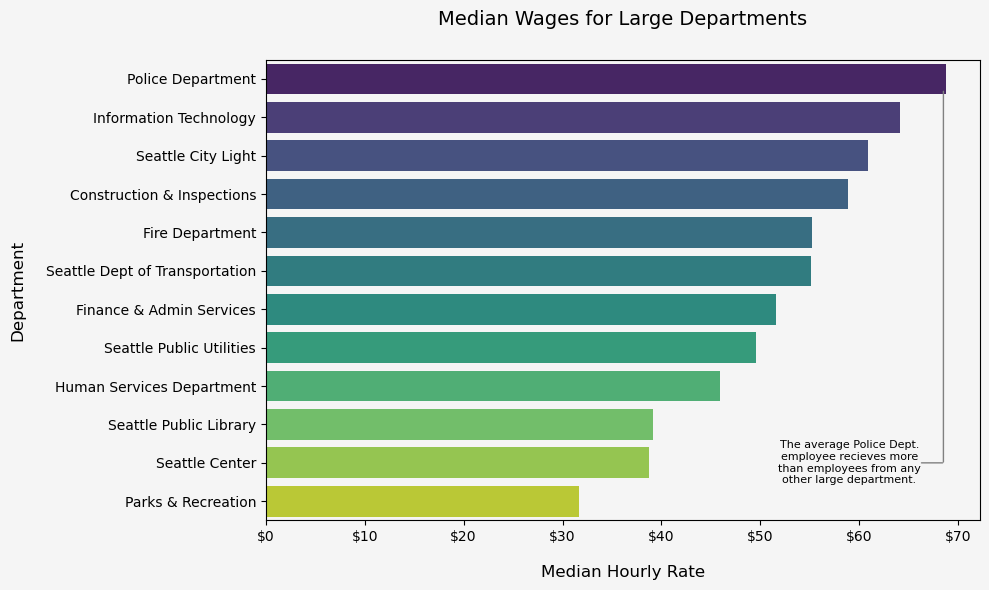

In [4]:
# Filter departments with more than 400 employees
large_departments = departments[departments['num_employees'] > 400]

# Sort by median_hourly_rate in descending order
large_departments = large_departments.sort_values('median_hourly_rate', ascending=False)

# Create the horizontal bar plot for 'median_hourly_rate'
plt.figure(figsize=(10, 6))
sns.barplot(data=large_departments, y='department', x='median_hourly_rate', palette='viridis')

# Format x-axis tick labels with "$" symbol
formatter = FuncFormatter(lambda x, _: f'${x:.0f}')
plt.gca().xaxis.set_major_formatter(formatter)


# Annotation text
text = "The average Police Dept.\nemployee recieves more\nthan employees from any\nother large department."

plt.text(59, 10, text,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=8,
    color='black'
)

# Annotation Line
def draw_line(start, end):
    plt.annotate(
    "",
    start,
    end,
    arrowprops=dict(arrowstyle='-', color='gray')
    )

draw_line((68.5, 0.25), (68.5, 10.05))
draw_line((68.7, 10), (66, 10))



# Add labels and title
plt.xlabel('Median Hourly Rate', fontsize=12, labelpad=15)
plt.ylabel('Department', fontsize=12, labelpad=15)
plt.title('Median Wages for Large Departments', fontsize=14, pad=25)

# Display the plot
plt.tight_layout()
plt.show()


### Hourly Labor Expenditures

C:\Users\sbrya\AppData\Local\Temp\ipykernel_38260\197276743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=departments_sorted, y='department', x='hourly_dept_exp', palette='viridis')


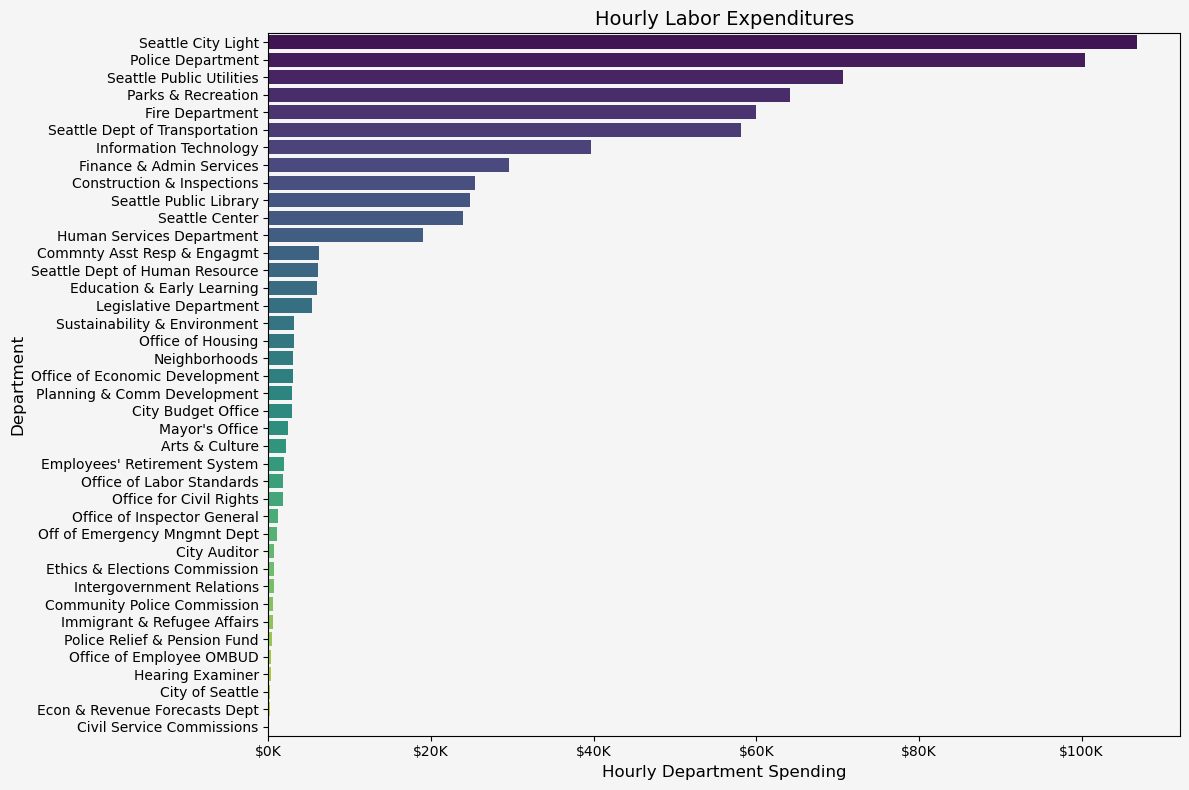

In [5]:
# Sort departments by 'hourly_dept_exp' in descending order
departments_sorted = departments.sort_values('hourly_dept_exp', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=departments_sorted, y='department', x='hourly_dept_exp', palette='viridis')

# Format x-axis tick labels with "$" and "K" suffix
formatter = FuncFormatter(lambda x, _: f'${x / 1000:.0f}K')
plt.gca().xaxis.set_major_formatter(formatter)

# Add labels and title
plt.xlabel('Hourly Department Spending', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.title('Hourly Labor Expenditures', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\sbrya\AppData\Local\Temp\ipykernel_38260\2263105043.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=departments_sorted, y='department', x='hourly_dept_exp', palette='viridis')


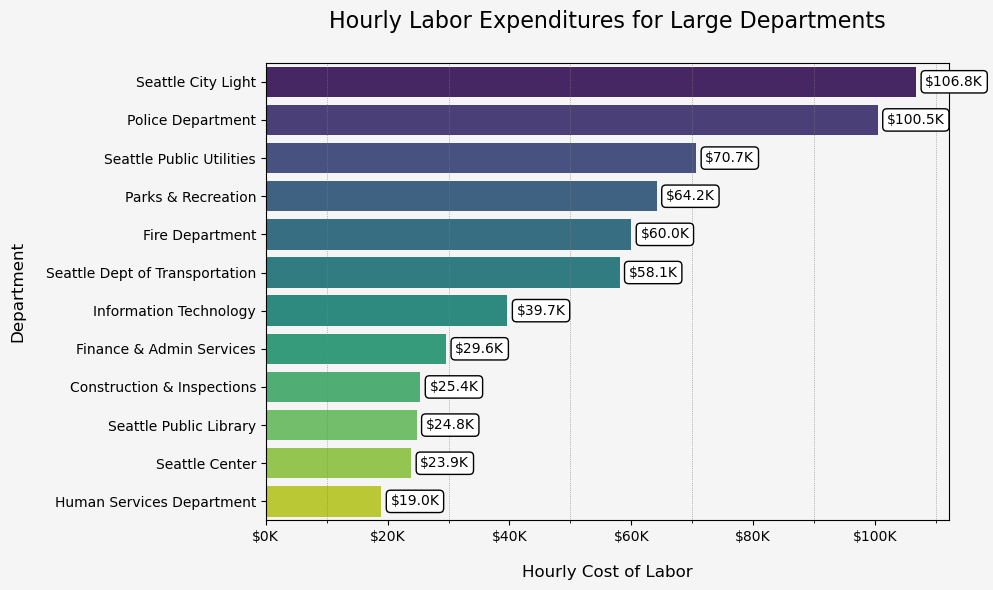

In [6]:
# Sort departments by 'hourly_dept_exp' in descending order and take the top 10
departments_sorted = large_departments.sort_values('hourly_dept_exp', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=departments_sorted, y='department', x='hourly_dept_exp', palette='viridis')

# Enable minor ticks and add gridlines only on the x-axis
plt.grid(True, axis='x', which='minor', linestyle=':', linewidth=0.5, color='gray')  # Minor gridlines on x-axis only

# Set minor gridlines every 10,000 x units
plt.gca().xaxis.set_minor_locator(MultipleLocator(10000))  # Every 10,000 units on x-axis

# Format x-axis tick labels
formatter = FuncFormatter(lambda x, _: f'${x / 1000:.0f}K')
ax.xaxis.set_major_formatter(formatter)

# Add labels to each bar (formatted with 'K' suffix)
for p in ax.patches:
    value = p.get_width()
    label = f'${value / 1000:.1f}K'  # Format to nearest thousand with "K" suffix 
    ax.text(p.get_width() + 1500, p.get_y() + p.get_height() / 2, 
            label, 
            horizontalalignment='left', verticalalignment='center', fontsize=10, color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))  # Add background and border

# Add labels and title
plt.xlabel('Hourly Cost of Labor', fontsize=12, labelpad=15)
plt.ylabel('Department', fontsize=12, labelpad=15)
plt.title('Hourly Labor Expenditures for Large Departments', fontsize=16, pad=25)

# Display the plot
plt.tight_layout()
plt.show()


### Comparing the Size and Payscales of the Largest City Departments

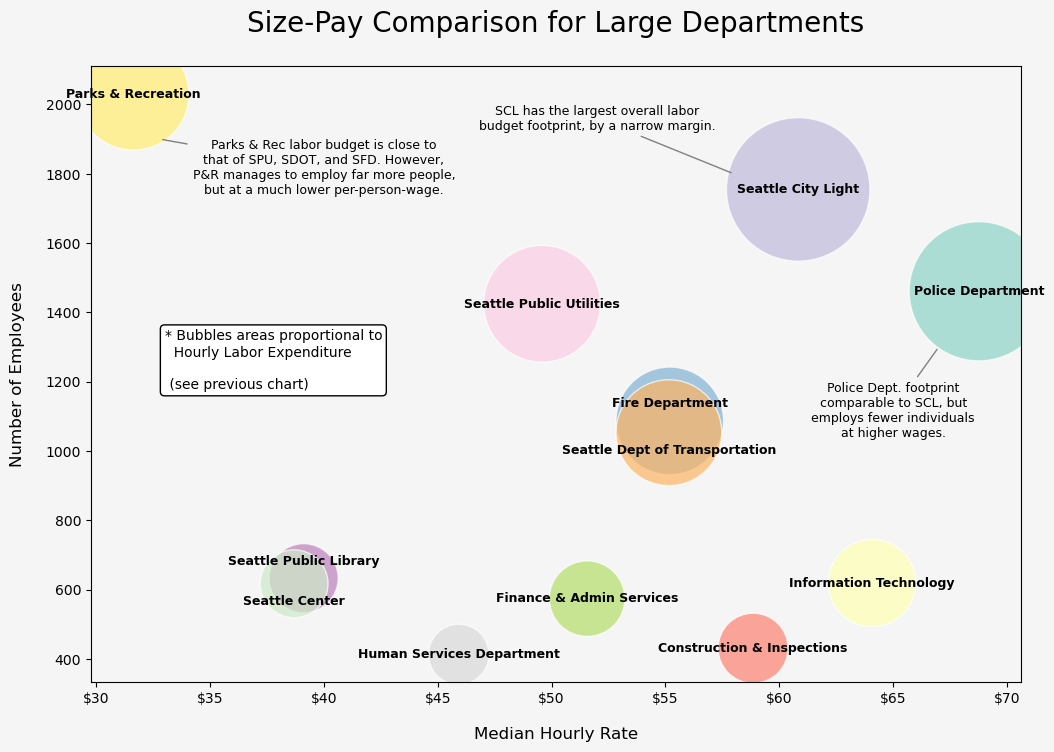

In [8]:
# Figure initiation
plt.figure(figsize=(12, 8))

# Bubble plot creation
plt.scatter(
    x=large_departments['median_hourly_rate'],
    y=large_departments['num_employees'],
    s=(large_departments['hourly_dept_exp']) / 10,
    c=range(len(large_departments)),
    cmap='Set3',
    alpha=0.7,
    edgecolors='w',
)

# Bubble (Department) labels
for i, row in large_departments.iterrows():
    if row['department'] in ["Seattle Public Library", "Fire Department"]:
        y = row['num_employees'] + 50
    elif row['department'] in ["Seattle Center", "Seattle Dept of Transportation"]:
        y = row['num_employees'] - 50
    else:
        y = row['num_employees']

    plt.text(
        row['median_hourly_rate'],  # x-coord
        y,  # y-coord
        row['department'],  # text
        ha='center',
        va='center',
        fontsize=9,
        weight='bold'
    )

# Asterisk note
plt.text(33, 1180,
        "* Bubbles areas proportional to\n  Hourly Labor Expenditure\n\n (see previous chart)",
        fontsize=10,
        bbox=dict(
            facecolor='white',
            boxstyle='round,pad=0.3'
        )
    )

# Formula for quickly-plotted annotations
def annot(text, xy=(0,0), xytext=(0,0)):
    plt.annotate(
        text,
        xy=xy,
        xytext=xytext,
        arrowprops=dict(arrowstyle='-', color='gray'),
        fontsize=9,
        color='black',
        ha='center',
        va='top'
    )


# Police Department annotation
police_text = """Police Dept. footprint
comparable to SCL, but
employs fewer individuals
at higher wages."""

annot(police_text, xy=(67, 1300), xytext=(65, 1200))


# Seattle City Light annotation
scl_text = """SCL has the largest overall labor
budget footprint, by a narrow margin."""

annot(scl_text, xy=(58, 1800), xytext=(52, 2000))


# Parks & Recreation annotation
pnr_text = """Parks & Rec labor budget is close to
that of SPU, SDOT, and SFD. However,
P&R manages to employ far more people,
but at a much lower per-person-wage."""

annot(pnr_text, xy=(32.8, 1900), xytext=(40, 1900))


# Format x-tick labels
formatter = FuncFormatter(lambda x, _: f'${x:.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Title and axis labels
plt.xlabel('Median Hourly Rate', fontsize=12, labelpad=15)
plt.ylabel('Number of Employees', fontsize=12, labelpad=15)
plt.title('Size-Pay Comparison for Large Departments', fontsize=20, pad=25)

# Show figure
plt.show()
